In [1]:
ls


 Volume in drive V is New Volume
 Volume Serial Number is 4CD9-FF23

 Directory of V:\mathi

04-10-2022  17:35    <DIR>          .
04-10-2022  17:35    <DIR>          ..
04-10-2022  17:33    <DIR>          .ipynb_checkpoints
04-10-2022  17:30       235,663,188 Flowers-Dataset.zip
04-10-2022  17:35               588 Untitled.ipynb
               2 File(s)    235,663,776 bytes
               3 Dir(s)  44,565,209,088 bytes free


In [4]:
ls

 Volume in drive V is New Volume
 Volume Serial Number is 4CD9-FF23

 Directory of V:\mathi

04-10-2022  17:39    <DIR>          .
04-10-2022  17:39    <DIR>          ..
04-10-2022  17:33    <DIR>          .ipynb_checkpoints
04-10-2022  17:39    <DIR>          flowers
04-10-2022  17:30       235,663,188 Flowers-Dataset.zip
04-10-2022  17:39             1,608 Untitled.ipynb
               2 File(s)    235,664,796 bytes
               4 Dir(s)  44,311,166,976 bytes free


In [5]:
cd flowers


V:\mathi\flowers


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
x_train=train_datagen.flow_from_directory(r"V:\mathi\flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [14]:
x_test=test_datagen.flow_from_directory(r"V:\mathi\flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [17]:
model=Sequential()

In [19]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(300,activation='relu'))

In [23]:
model.add(Dense(300,activation='relu'))

In [24]:
model.add(Dense(5,activation="softmax"))

In [25]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [26]:
len(x_train)

180

In [27]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 184s 1s/step - loss: 1.2770 - accuracy: 0.4605 - val_loss: 1.0517 - val_accuracy: 0.5701
Epoch 2/5
180/180 [==============================] - 152s 846ms/step - loss: 1.0635 - accuracy: 0.5701 - val_loss: 0.9624 - val_accuracy: 0.6085
Epoch 3/5
180/180 [==============================] - 133s 736ms/step - loss: 0.9731 - accuracy: 0.6196 - val_loss: 0.9193 - val_accuracy: 0.6312
Epoch 4/5
180/180 [==============================] - 134s 744ms/step - loss: 0.9044 - accuracy: 0.6412 - val_loss: 0.8394 - val_accuracy: 0.6725
Epoch 5/5
180/180 [==============================] - 135s 749ms/step - loss: 0.8593 - accuracy: 0.6713 - val_loss: 0.8132 - val_accuracy: 0.6873


In [28]:
model.save("flower1.h5")

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [36]:
model=load_model("V:/mathi/flowers/flower1.h5")

In [37]:
img=image.load_img("V:/mathi/flowers/rose/11102341464_508d558dfc_n.jpg",target_size=(64,64))

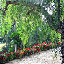

In [38]:
img

In [40]:
x=image.img_to_array(img)

In [41]:
x

array([[[211., 252., 186.],
        [102., 158.,  97.],
        [232., 253., 174.],
        ...,
        [ 83., 141.,  56.],
        [133., 158., 129.],
        [129., 184., 101.]],

       [[170., 202., 189.],
        [124., 169., 102.],
        [142., 174.,  98.],
        ...,
        [ 58., 107.,  26.],
        [ 30.,  79.,  50.],
        [163., 189., 186.]],

       [[197., 208., 204.],
        [216., 215., 221.],
        [140., 176., 104.],
        ...,
        [109., 158.,  93.],
        [ 72., 117.,  74.],
        [144., 163., 169.]],

       ...,

       [[ 17.,  36.,  32.],
        [ 22.,  29.,  21.],
        [ 17.,  34.,  18.],
        ...,
        [232., 222., 212.],
        [ 22.,  21.,  17.],
        [ 32.,  31.,  45.]],

       [[ 12.,  22.,  31.],
        [ 55.,  53.,  56.],
        [ 32.,  34.,  29.],
        ...,
        [189., 180., 185.],
        [ 69.,  64.,  70.],
        [  1.,   0.,  25.]],

       [[  6.,  12.,  36.],
        [  7.,   4.,  25.],
        [ 11.,  

In [42]:
x.ndim

3

In [43]:
x=np.expand_dims(x,axis=0)

In [44]:
x.ndim

4

In [45]:
pred=model.predict(x)

In [46]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [47]:
labels=["daisy","dandelion","rose","sunflower","tulip"]

In [48]:
np.argmax(pred)

3

In [49]:
labels[4]

'tulip'

In [50]:
labels[np.argmax(pred)]

'sunflower'